https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/ 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
import keras.preprocessing.image
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os
import pandas as pd

import numpy as np
import random as rd

## Loading the data

In [2]:
labels = ['PNEUMONIA\\', 'NORMAL\\']
img_size = 224

"""
It uses the Opencv imread function to read the images in the RGB format 
and resize the images to our desired width and height.
"""
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                # Selección de todas las dimensiones menos la última. [...,::-1]
                # En otras palabras se seleccionarán todos los píxeles de la imagen,
                # independientemente de su altura y su anchura.
                # print(os.path.join(path, img))
                ruta = os.path.join(path, img)
                img_arr = cv2.imread(ruta)
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    x,y=zip(*data)
    return np.array(x),np.array(y) 


X_train,y_train = get_data("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\sistemas_de_aprendizaxe_automatico\\neumonia\\train")
X_test, y_test = get_data("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\sistemas_de_aprendizaxe_automatico\\neumonia\\test")
X_val, y_val = get_data("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\sistemas_de_aprendizaxe_automatico\\neumonia\\val")

In [3]:
print(len(X_train))

5216


In [4]:
print(len(X_test))

624


In [5]:
print(len(X_val))

16


In [6]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test =np.array(X_test) / 255

X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_train.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
X_test

array([[[0.07058824, 0.05882353, 0.06666667, ..., 0.35686275,
         0.3372549 , 0.34117647],
        [0.06666667, 0.05882353, 0.0745098 , ..., 0.34901961,
         0.37254902, 0.34901961],
        [0.07058824, 0.04313725, 0.07843137, ..., 0.35294118,
         0.3372549 , 0.30588235],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.18431373, 0.15294118, 0.17254902, ..., 0.15686275,
         0.10980392, 0.14509804],
        [0.59215686, 0.27843137, 0.37647059, ..., 0.31372549,
         0.27843137, 0.2       ],
        [0.36078431, 0.66666667, 0.6745098 , ..., 0.17647059,
         0.16078431, 0.11372549],
        ...,
        [0.27843137, 0.16862745, 0.10980392, ..., 0.03137255,
         0.08235294, 0.09803922],
        [0.2

In [9]:
X_train.shape

(5216, 224, 224)

In [10]:
from tensorflow.keras import layers, models

num_classes = 1

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Extraer características de diferentes niveles de abstracción en las imágenes
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Reducir la dimensionalidad de las características y controlar el sobreajuste
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Aplana la salida de la última capa convolucional en un vector unidimensional antes de introducirla en las capas densas
model.add(layers.Flatten())

# Capas densas para procesar las características aplanadas y realizar la clasificación final
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,527,105 (169.86 MB)

 Trainable params: 44,527,105 (169.86 MB)

 Non-trainable params: 0 (0.00 B)

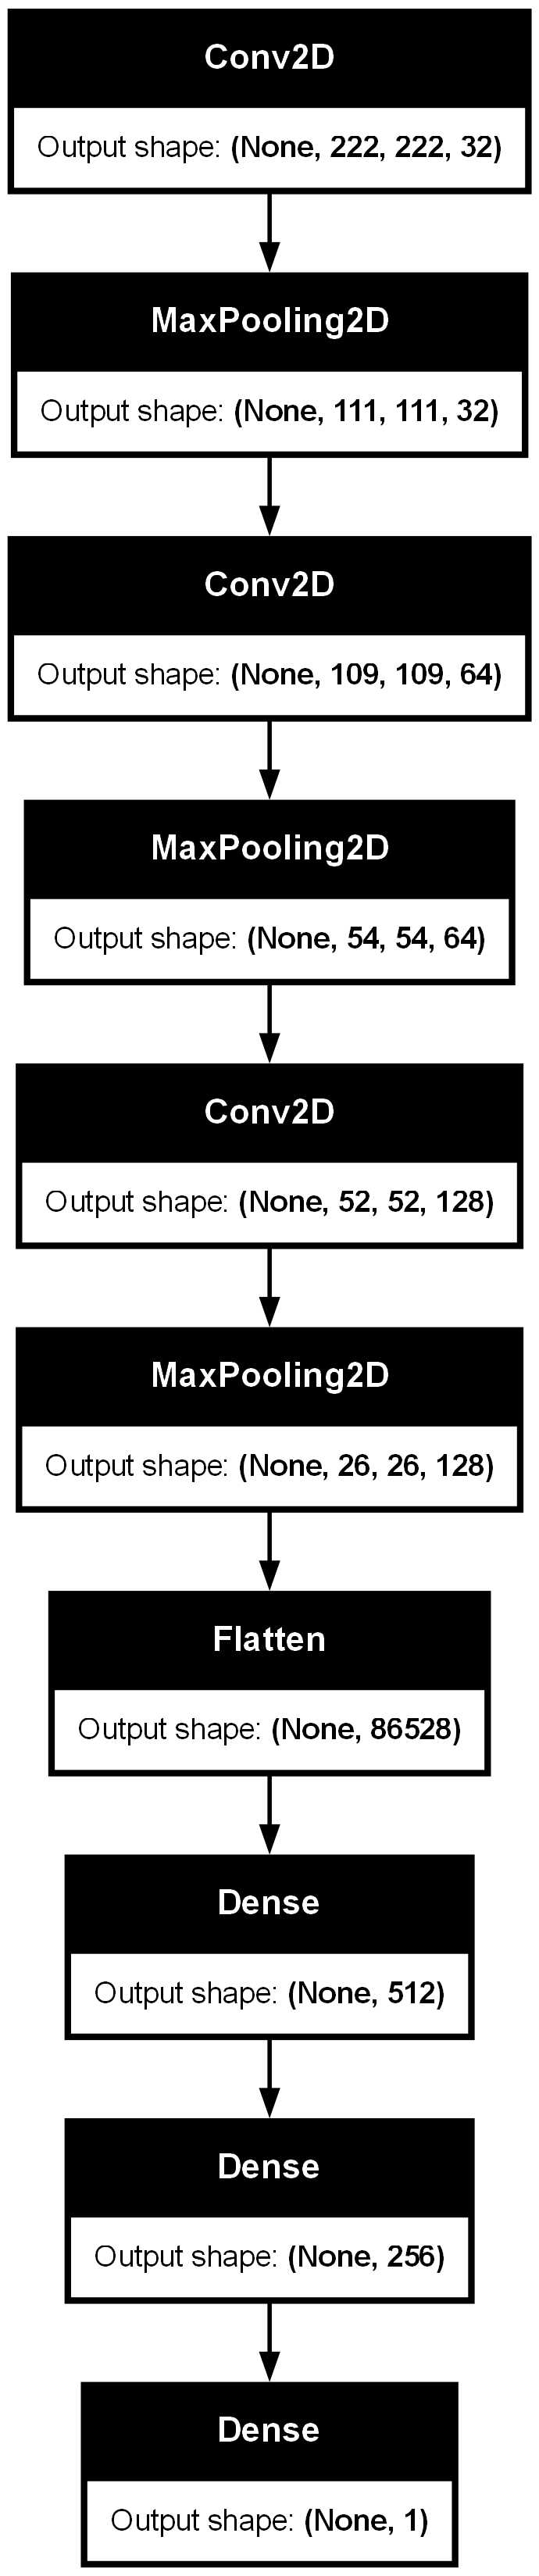

In [11]:
keras.utils.plot_model(model,"neumonia_model.png", show_shapes=True)

In [12]:
#model.compile(loss="sparse_categorical_crossentropy",  optimizer="adam",   metrics=["accuracy"])

In [13]:
epochs = 100000
batch_size = 20

early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


historia = model.fit(X_train, y_train, epochs=epochs,
                      batch_size = batch_size,
                      callbacks=[early_stopping],
                      validation_data=(X_val, y_val))

Epoch 1/100000
261/261 ━━━━━━━━━━━━━━━━━━━━ 130s 489ms/step - accuracy: 0.8229 - loss: 0.4605 - val_accuracy: 0.8750 - val_loss: 0.2729
Epoch 2/100000
261/261 ━━━━━━━━━━━━━━━━━━━━ 129s 493ms/step - accuracy: 0.9675 - loss: 0.0897 - val_accuracy: 0.9375 - val_loss: 0.1532
Epoch 3/100000
261/261 ━━━━━━━━━━━━━━━━━━━━ 126s 485ms/step - accuracy: 0.9706 - loss: 0.0870 - val_accuracy: 1.0000 - val_loss: 0.0326
Epoch 4/100000
261/261 ━━━━━━━━━━━━━━━━━━━━ 125s 479ms/step - accuracy: 0.9782 - loss: 0.0547 - val_accuracy: 0.8125 - val_loss: 0.1977
Epoch 5/100000
261/261 ━━━━━━━━━━━━━━━━━━━━ 121s 463ms/step - accuracy: 0.9862 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 0.0330
Epoch 6/100000
261/261 ━━━━━━━━━━━━━━━━━━━━ 124s 476ms/step - accuracy: 0.9908 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.0775


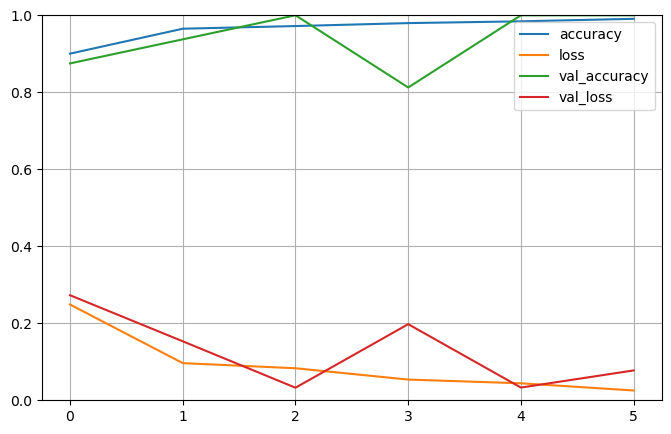

In [14]:
pd.DataFrame(historia.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9291 - loss: 0.2732


[0.9588193893432617, 0.7804487347602844]

## Prueba del modelo

In [16]:
ix = 500
pru = X_test[ix:ix+100]
pru.shape
ret = model.predict(pru)
ret

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


array([[5.21159291e-01],
       [9.97026742e-01],
       [9.97240245e-01],
       [4.36145812e-04],
       [9.30478871e-01],
       [1.60884447e-02],
       [8.26212168e-01],
       [1.33331999e-01],
       [1.33331999e-01],
       [3.49728391e-04],
       [1.16473939e-02],
       [3.32782157e-08],
       [3.41196299e-01],
       [1.30301942e-06],
       [7.61222094e-03],
       [9.91268039e-01],
       [3.06686293e-03],
       [3.84828687e-01],
       [5.62212408e-01],
       [4.27108211e-03],
       [7.11573477e-07],
       [4.13132817e-01],
       [1.21098515e-02],
       [1.70141993e-05],
       [1.67619269e-02],
       [7.77328014e-03],
       [6.26542214e-06],
       [2.51258444e-03],
       [1.32759921e-02],
       [1.32759921e-02],
       [4.72799235e-04],
       [1.07847787e-01],
       [3.05491523e-03],
       [3.99685372e-03],
       [1.54413588e-04],
       [5.82820394e-05],
       [1.47529086e-02],
       [9.30495709e-02],
       [8.36245894e-01],
       [9.73809600e-01],


In [17]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,